# Softmax and Crossentropy

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=c36lUUr864M&t=8654s

## Softmax

$ \Large S(y_{i}) = \frac{e^{y_{i}}}{\sum e^{y_{j}}} $

Softmax applies the exponential function to each element and normalizes it by dividing the sum of all these exponentials. It basically squashes the output to be between 0 and 1. This way we get probabilities.

## Softmax Layer

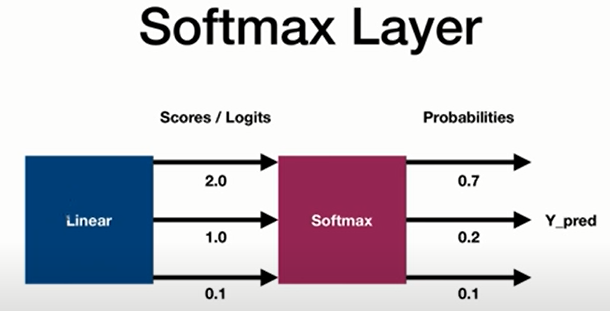

Let's say that we have a linear layer which has three output values. These values are so-called **scores** or **logits** because they are raw values. Then we apply the softmax and get probabilities. Each value is squashed to be between zero and one. The highest value from picture above gets the highest probability. After that we can choose for the class with the highest probability.

In [1]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print("softmax numpy:", outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]


In [2]:
x = torch.tensor([2.0, 1.0, 0.1])
# we have to specify the dimension
outputs = torch.softmax(x, dim=0)
print("softmax torch:", outputs)

softmax torch: tensor([0.6590, 0.2424, 0.0986])


## Cross-Entropy

$ \large D(\hat{Y},Y) = -\frac{1}{N}  \cdot \sum Y_{i} \cdot log(\hat{Y}) $

$ \large \begin{matrix} Y=[1,0,0] \\ \hat{Y}=[0.7,0.2,0.1] \end{matrix} \Longrightarrow D(\hat{Y},Y)=0.35$

$ \large \begin{matrix} Y=[1,0,0] \\ \hat{Y}=[0.1,0.3,0.7] \end{matrix} \Longrightarrow D(\hat{Y},Y)=2.3$

Softmax is often combines with the so-called **cross-entropy loss**. **Cross-Entropy loss** measures the performance of our classification model whse output is a probability between zero and one. It can be used also in multi-class problems. The loss increases as the predicted probability diverges from the actual label. The better our prediction the lower is our loss